In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Loading the data
df = pd.read_csv("Mall_Customers.csv")

In [46]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Checking for null values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



### Univariate Analysis


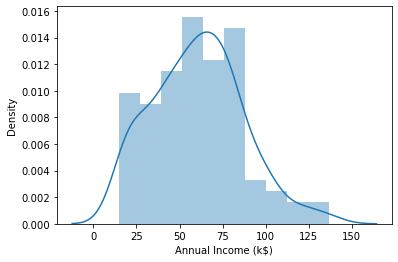

In [9]:
# Analysing the distribution of Annual Income

sns.distplot(df['Annual Income (k$)'])
plt.show()

**The distribution is skewed slightly towards the higher income amount**

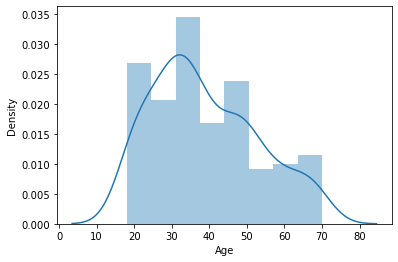

In [10]:
# Analysing the distribution of Age

sns.distplot(df['Age'])
plt.show()

**Age wise, shoppers are distributed more with < 50yrs. The distribution is skewed towards right**

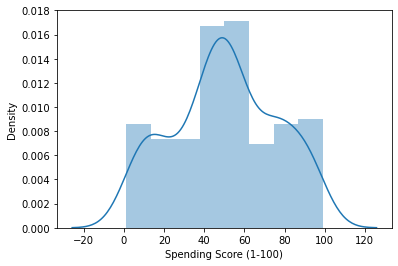

In [11]:
# Analysing the distribution of Spending Score

sns.distplot(df['Spending Score (1-100)'])
plt.show()

**The  distribution is gaussian like**

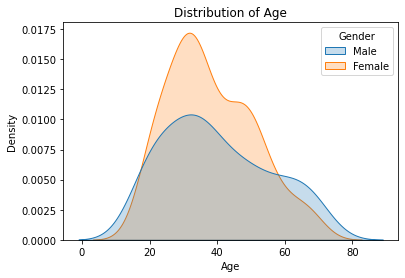

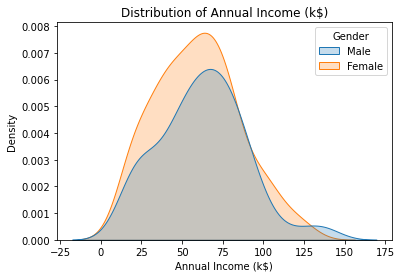

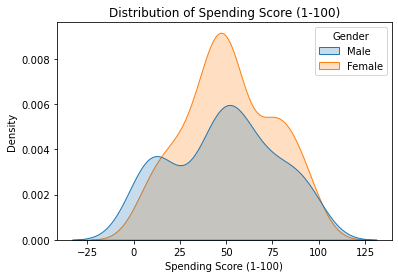

In [12]:
# Plotting distribution segementing the gender

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True, hue=df['Gender'])
    plt.title('Distribution of '+i)

**The number of female shoppers seems to be more than males.**

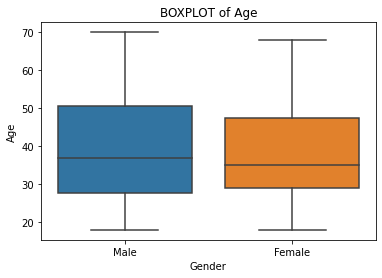

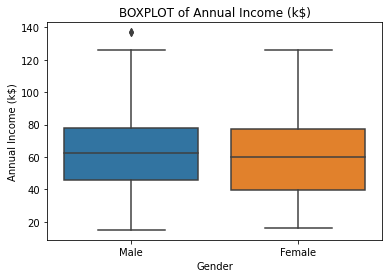

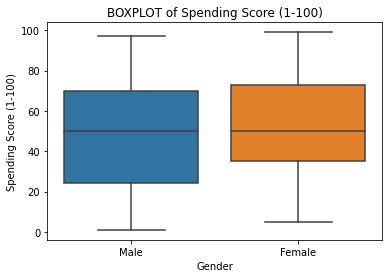

In [13]:
# Plotting box plots

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(y=df[i], x =df['Gender'])
    plt.title('BOXPLOT of '+i)

- **The variance of annual income of male shoppers is less than females**
- **Female shoppers has a better shopping score than males**

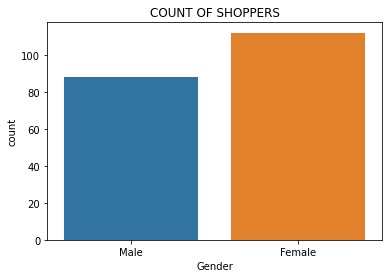

In [14]:
sns.countplot( x='Gender', data=df)
plt.title("COUNT OF SHOPPERS")
plt.show()

**Number of female shoppers is more in the data**


In [47]:
# Dropping Customer ID column since it is just the serial number
df=df.drop('CustomerID', axis= 1)

In [48]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40



### Bivariate Analysis:

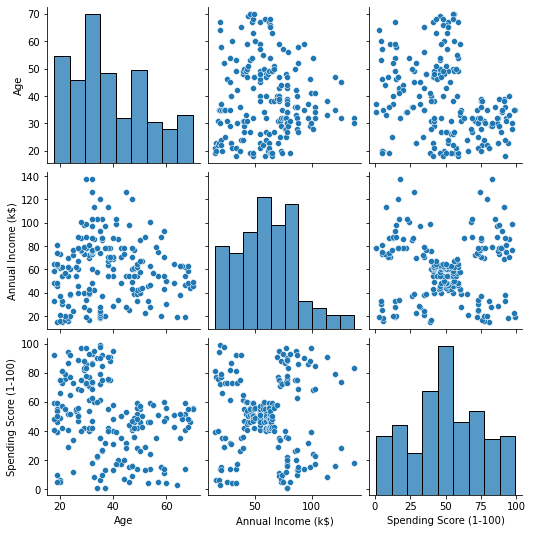

In [17]:
# pair-plots

sns.pairplot(data=df)

**The Spending Score vs Annual Income scatter plot shows some points which can be clustered together**

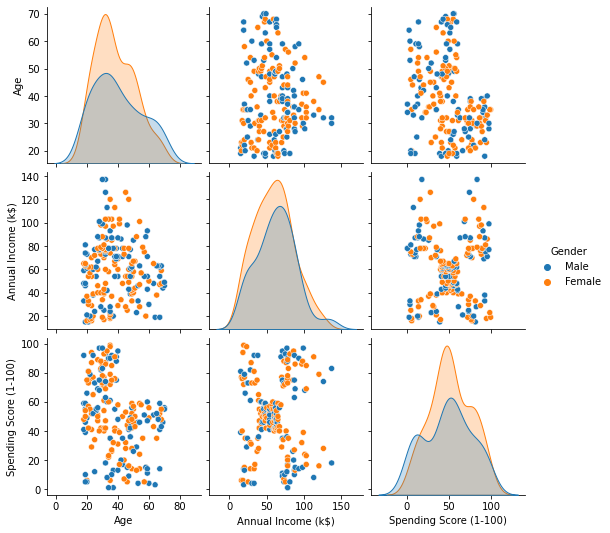

In [18]:
sns.pairplot(data=df, hue ='Gender')

In [19]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<AxesSubplot:>

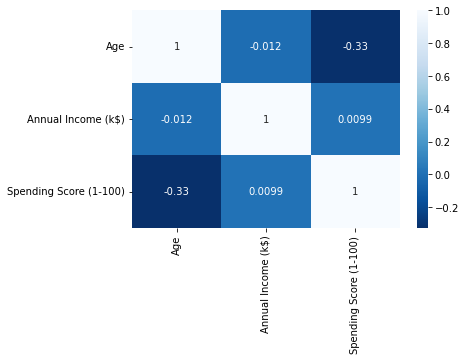

In [20]:
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')

***As seen from the heatmap, the spending score is negatively correlated with age. Higher Age shoppers have chances of low spenders.***


## Clustering: Univariate, Bivariate, Multivariate


In [21]:
# Using Kmeans Clustering algorithm for univariate clustering first

clust = KMeans()
clust.fit(df[['Annual Income (k$)']])

KMeans()

In [22]:
clust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3,
       3, 3])

In [23]:
df['Income Cluster']= clust.labels_

In [24]:
df['Income Cluster'].value_counts()

2    42
4    36
0    36
6    26
1    24
5    16
7    12
3     8
Name: Income Cluster, dtype: int64

In [25]:
# Inertia as a score to get the ideal number of cluster.

clust.inertia_

2897.7750305250306

In [26]:
# Calculating inertia scores for different n_clusters

inertia_scores=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
    

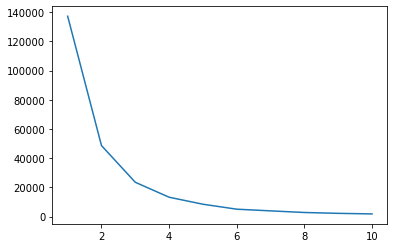

In [27]:
# Trying to find the optimum no. of clusters by Elbow method

plt.plot(range(1,11),inertia_scores)

In [49]:
# Taking Cluster number = 3 from elbow method

clust = KMeans(n_clusters = 3)
clust.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [50]:
df['Income Cluster'] = clust.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [51]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


**The 3 different clusters have well separated mean values of Annual Income.**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

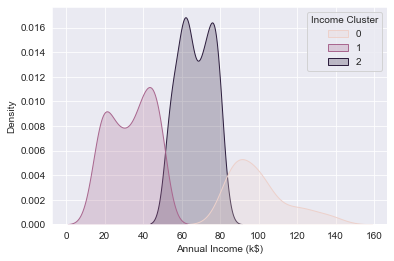

In [52]:
sns.kdeplot(df['Annual Income (k$)'], shade=True, hue=df['Income Cluster'])


### Bivariate Clustering


In [32]:
# We are clustering the points wrt Annual Income and Spending Score

clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending & Income Cluster'] =clustering2.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,4
2,Female,20,16,6,1,3
3,Female,23,16,77,1,4
4,Female,31,17,40,1,3


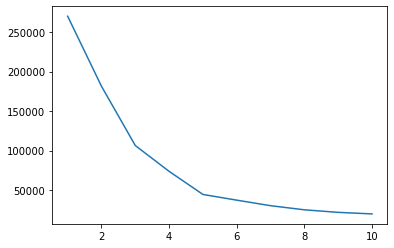

In [33]:
# Calculating inertia scores for different n_clusters

intertia_scores2=[]

for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11),intertia_scores2)


In [53]:
# From the plot, we can see the elbow at n_clusters = 5

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending & Income Cluster'] =clustering2.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


In [54]:
# Finding the centroids of the clusters

centers = np.array(clustering2.cluster_centers_)


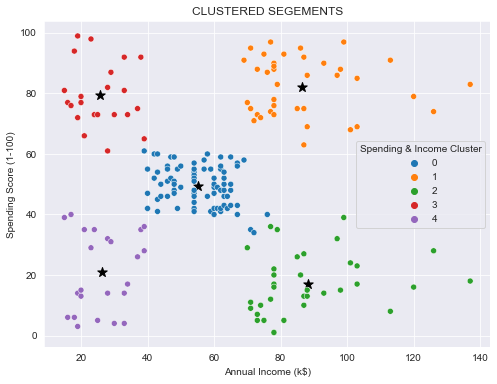

In [55]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(x=centers[:,0], y=centers[:,1], s=100, c='black', marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending & Income Cluster', palette='tab10')
plt.title('CLUSTERED SEGEMENTS')
plt.savefig('Spending_Income_Cluster.png')

- **The customers are well clustered into groups as seen into 5 segments.**
- **Cluster 1 shoppers have high annual income and spends more. They are ideal shoppers for us.**
- **Cluster 0 has medium spending score and medium income. They are also our potential target.**
- **Cluster 3 shoppers are the most interesting. They have low income but spend high on products. We should try targetting them and get more sales.**

In [56]:
pd.crosstab(df['Spending & Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending & Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


***Cluster 1 and 3 shoppers are comprising of more female shoppers. This should be kept in mind while targetting them.*** 

In [57]:
df.groupby('Spending & Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


- **Profile of the Cluster 1 shoppers looks like of avg. age of 33 with high income.**
- **Cluster 3 shoppers are younger customers, probably just out of college and spending more on technology and lifestyle products like phones, PCs, Playstation etc.**



### Clustering by Age and Spending Score

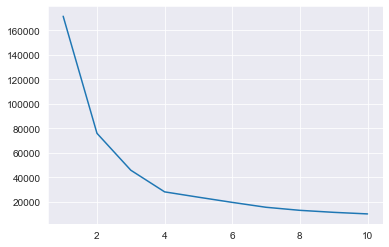

In [39]:
# Calculating inertia scores for different n_clusters

intertia_scores3=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Age','Spending Score (1-100)']])
    intertia_scores3.append(kmeans.inertia_)

plt.plot(range(1,11),intertia_scores3)


In [40]:
# From the plot, we can see the elbow at n_clusters = 4

clustering = KMeans(n_clusters=4)
clustering.fit(df[['Age','Spending Score (1-100)']])
df['Spending & Age Cluster'] =clustering.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income Cluster,Spending & Age Cluster
0,Male,19,15,39,1,2,3
1,Male,21,15,81,1,4,2
2,Female,20,16,6,1,2,0
3,Female,23,16,77,1,4,2
4,Female,31,17,40,1,2,3


In [41]:
# Finding the centroids of the clusters

centers = np.array(clustering.cluster_centers_)


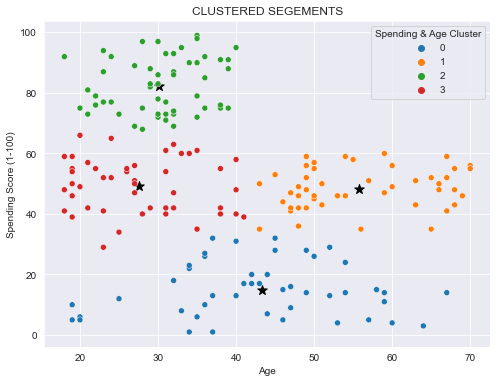

In [44]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(x=centers[:,0], y=centers[:,1], s=100, c='black', marker='*')
sns.scatterplot(data=df, x ='Age', y='Spending Score (1-100)', hue='Spending & Age Cluster', palette='tab10')
plt.title('CLUSTERED SEGEMENTS')
plt.savefig('Spending_Age_Cluster.png')


**Our ideal customer segment to target would be Cluster 2 shoppers with age < 40 and spending score > 60.**


In [43]:
pd.crosstab(df['Spending & Age Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending & Age Cluster,,
0,0.500000,0.500000
1,0.541667,0.458333
2,0.578947,0.421053
3,0.617021,0.382979


**57% Cluster 2 Shoppers are females.**